In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


train_data = pd.read_csv('/content/train_data_titanic.csv')

In [2]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DATA PREPARATION

When using linear regression as a predictive model, it is extremely important to remember that the ranges for all attributes in the scoring data
must be within the ranges for the corresponding attributes in the training data. This is because a training data set cannot be relied upon to
predict a target attrtibute for observations whose values fall outside the training data set’s values.

In [3]:
# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())

Missing values in training data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


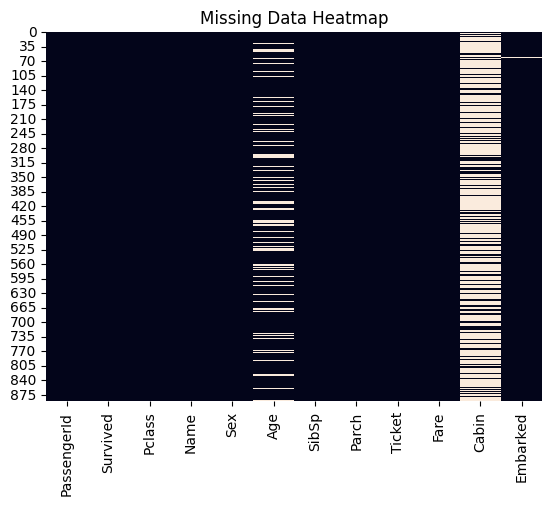

In [4]:
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

HANDLING MISSING VALUES

In [5]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data = train_data.dropna(subset=['Embarked'])

In [6]:
# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())

Missing values in training data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


The Missing Values in the Cabin were not removed as they represent more than 50% of the data set. Removing this would potentially affect the accuracy the result.

Visualize key features like Age, Fare, and Survived

Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

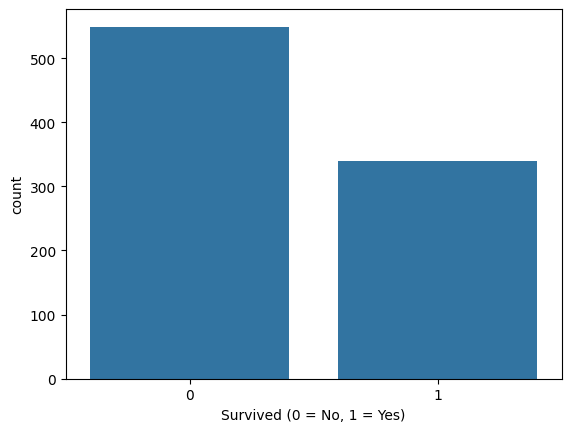

In [7]:
sns.countplot(x='Survived', data=train_data)
plt.xlabel("Survived (0 = No, 1 = Yes)")

In [8]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'],drop_first=True)
display(train_data)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,True,False,False


In [9]:
X = train_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = train_data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODELING

Logistic regression is an excellent way to predict whether or not something will happen, and how confident we are in such predictions. It takes a number of numeric attributes into account and then uses those through a training data set to predict the probable outcomes in a comparable scoring data set. Logistic regression uses a nominal target attribute to categorize observations in a scoring data set into their probable outcomes.

As with linear regression, the scoring data must have ranges that fall within their corresponding training data ranges.

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.797752808988764
Confusion Matrix:
[[92 17]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


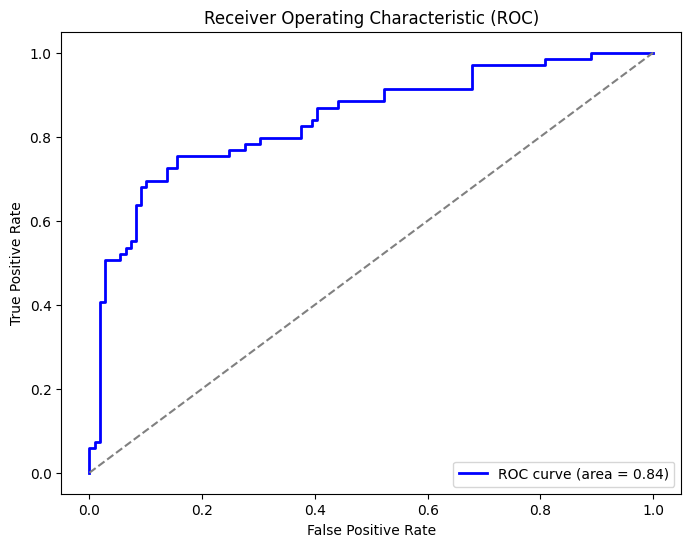

In [11]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [12]:
score_data = pd.read_csv('/content/score_data_titanic.csv')

score_data.info()
score_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4 non-null      int64  
 1   Pclass       4 non-null      int64  
 2   Name         4 non-null      object 
 3   Sex          4 non-null      object 
 4   Age          4 non-null      int64  
 5   SibSp        4 non-null      int64  
 6   Parch        4 non-null      int64  
 7   Fare         4 non-null      float64
 8   Embarked     4 non-null      object 
dtypes: float64(1), int64(5), object(3)
memory usage: 416.0+ bytes


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,4.000000,4.000000,4.00000,4.00,4.0,4.000000
mean,893.500000,2.250000,43.25000,0.25,0.0,8.750000
std,1.290994,0.957427,14.45395,0.50,0.0,1.307032
min,892.000000,1.000000,30.00000,0.00,0.0,7.750000
25%,892.750000,1.750000,33.00000,0.00,0.0,7.750000
50%,893.500000,2.500000,40.50000,0.00,0.0,8.375000
75%,894.250000,3.000000,50.75000,0.25,0.0,9.375000
max,895.000000,3.000000,62.00000,1.00,0.0,10.500000


In [13]:
score_data = score_data.drop(columns=['PassengerId'])

score_data = pd.get_dummies(score_data, columns=['Sex', 'Embarked'], drop_first=True)

score_data['Age'] = score_data['Age'].fillna(score_data['Age'].mean())
score_data['Fare'] = score_data['Fare'].fillna(score_data['Fare'].mean())
score_data = score_data.reindex(columns=X.columns, fill_value=0)
predictions = model.predict(score_data)

score_data['PassengerId'] = pd.read_csv('/content/score_data_titanic.csv')['PassengerId']


score_data['Survived'] = predictions
score_data[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)

In [14]:
# Display the predictions with PassengerId
print(score_data[['PassengerId', 'Survived']])

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1


Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

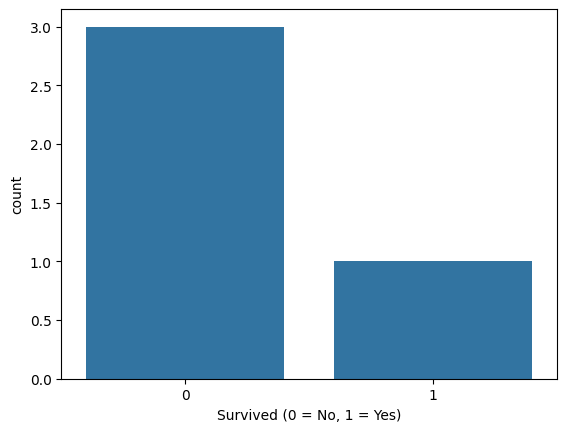

In [22]:
sns.countplot(x='Survived', data=score_data)
plt.xlabel("Survived (0 = No, 1 = Yes)")

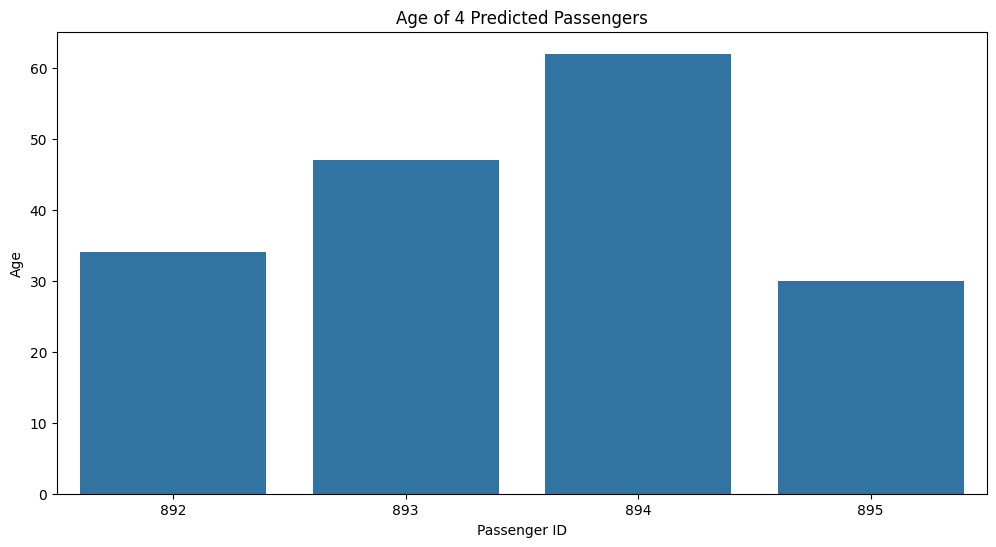

In [27]:
# Select the relevant columns for visualization
predicted_passengers = score_data[['PassengerId', 'Sex_male', 'Age', 'Fare', 'Embarked_S', 'Survived']]

# Set the figure size for a better view
plt.figure(figsize=(12, 6))

# Plot the data for these passengers
sns.barplot(x='PassengerId', y='Age', data=predicted_passengers)
plt.title('Age of 4 Predicted Passengers')
plt.xlabel('Passenger ID')
plt.ylabel('Age')
plt.show()



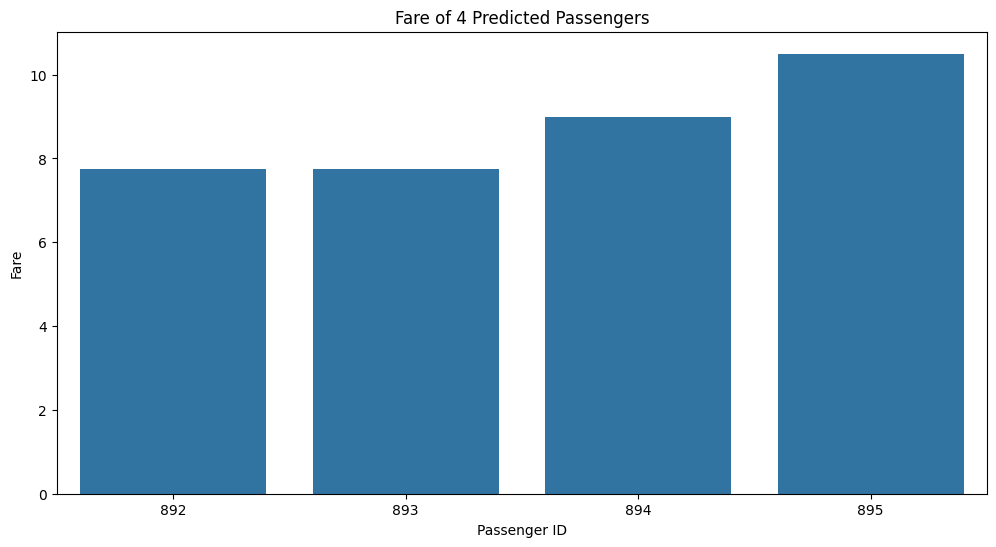

In [28]:
# Barplot for Fare of 4 predicted passengers
plt.figure(figsize=(12, 6))
sns.barplot(x='PassengerId', y='Fare', data=predicted_passengers)
plt.title('Fare of 4 Predicted Passengers')
plt.xlabel('Passenger ID')
plt.ylabel('Fare')
plt.show()


**CONCLUSION**

Based in the predicted model, there were 3 passengers who would not survive, while there was only 1 passenger who is likely to survive the titanic.

**FINDINGS**

Based on the visual presentation of the predicted passengers' Age, Fare, and Gender, Survival Status is likely influenced by the mentioned factors. Passengers who are much younger and have paid higher fares have higher chance of survival, While those who are much older and have paid lower fares have the lower chance of survival.